In [13]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import math
plt.rcParams['figure.figsize'] = (20.0, 10.0)
from mpl_toolkits.mplot3d import Axes3D

data = pd.read_csv('dataset.csv')
# data= (data- data.mean())/data.std()
data= ((data-data.min())/data.max()-data.min())

print(data.shape)
data.head()

(434874, 3)


,Longitude,Latitude,Altitude
0,-8.038644,-56.579743,8.799054
1,-8.038614,-56.579746,8.803235
2,-8.038582,-56.579749,8.806721
3,-8.038559,-56.579750,8.808178
4,-8.038537,-56.579750,8.809246


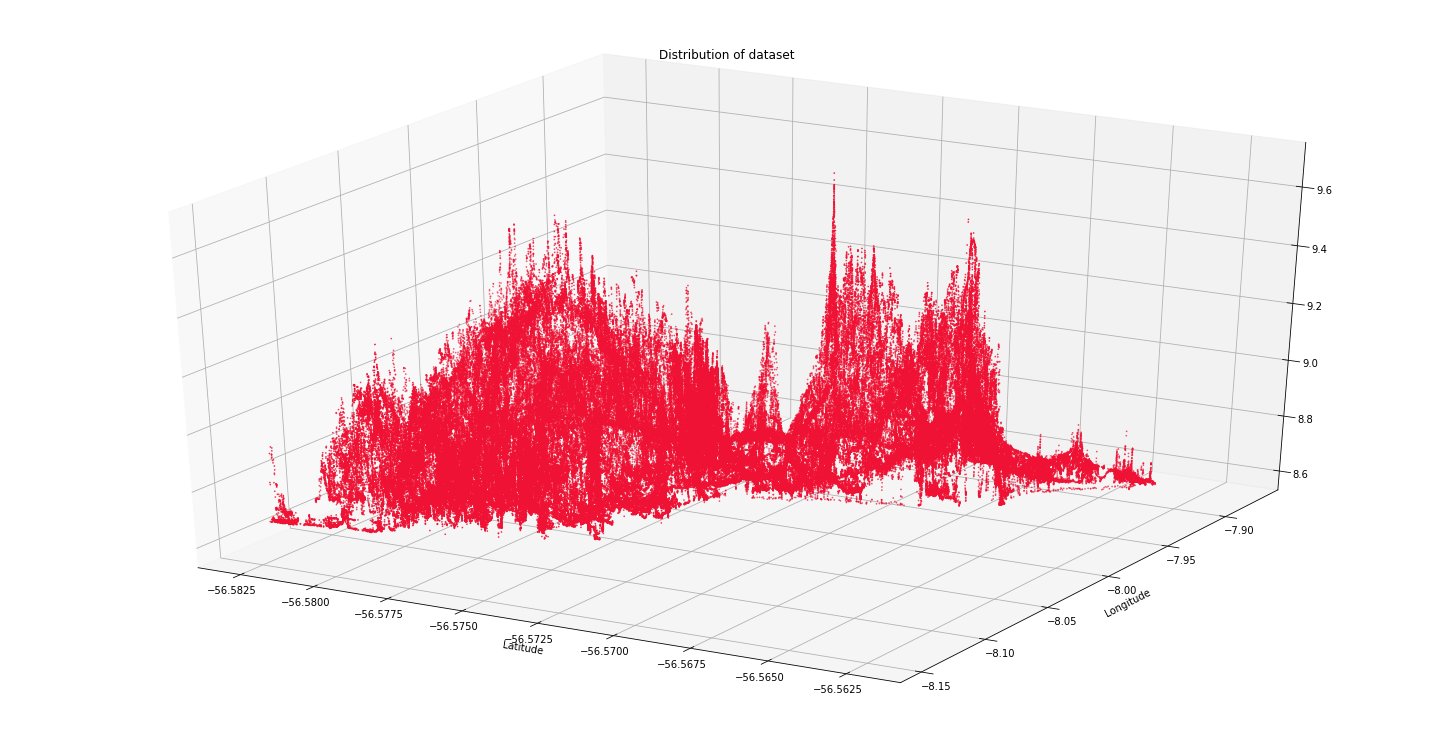

In [14]:
lat = data['Latitude'].values
lon = data['Longitude'].values
alt = data['Altitude'].values
# latm= np.mean(lat)



# Ploting the scores as scatter plot
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(lat,lon, alt, color='#ef1234',s=0.5)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("Distribution of dataset")
plt.show()

In [24]:
l = len(lat)
# print(l)
x0 = np.ones(l)
X = np.array([x0, lat, lon]).T
# Initial Coefficients
B = np.array([0,0,0])
Y = np.array(alt)
alpha = 0.0001

In [16]:
def costFuncL1Reg(X,Y,B):

    m=len(Y)
    global lmbda    
    Babs= np.absolute(B)
    sq_diff = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
    JL1 = (sq_diff)/(2*m) + (lmbda * np.sum(Babs[1:]))/(2)
#     print(Babs[1:])
    return JL1

In [17]:
def gradient_descentReg(X, Y, B, alpha, iterations,lmbda):
    cost_history = [0] * iterations
    m = len(Y)
    
    for iteration in range(iterations):
        # Hypothesis Values
        h = X.dot(B)
        # Difference b/w Hypothesis and Actual Y
        loss = h - Y
        # Gradient Calculation
        gradient = X.T.dot(loss) / m + (lmbda*(np.sign(B)))/2
        
        # Changing Values of B using Gradient
        B = B - alpha * gradient
        # New Cost Value
        cost = costFuncL1Reg(X, Y, B)
        cost_history[iteration] = cost
#         print(1)
        
    return B, cost_history

In [18]:
def costFuncL2Reg(X,Y,B):
    lmbda=1
    m=len(Y)
    
    sq_diff = np.sum((np.sum(np.array(X) * B, axis=1) - np.array(Y))**2)
    cost = (1/(2*(m))) * (sq_diff )+ (lmbda * np.sum(B[1:]**2))/2
    return cost

In [19]:
def gradient_descentRegL2(X, Y, B, alpha, iterations,lmbda):
    cost_history = [0] * iterations
    m = len(Y)
    
    for iteration in range(iterations):
        # Hypothesis Values
        h = X.dot(B)
        # Difference b/w Hypothesis and Actual Y
        loss = h - Y
        # Gradient Calculation
        gradient = X.T.dot(loss) / m + lmbda*np.sum(B)
        # Changing Values of B using Gradient
        B = B - alpha * gradient
        # New Cost Value
        cost = costFuncL2Reg(X, Y, B)
        cost_history[iteration] = cost
#         print(1)
        
    return B, cost_history

In [20]:
# lmbda =0.1
lmbda1=[0, 0.000001,0.00001,0.0001,0.001,0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,1]

[0]
[ 0.0027061  -0.15309628 -0.02164847] 
 0.08737238813517731


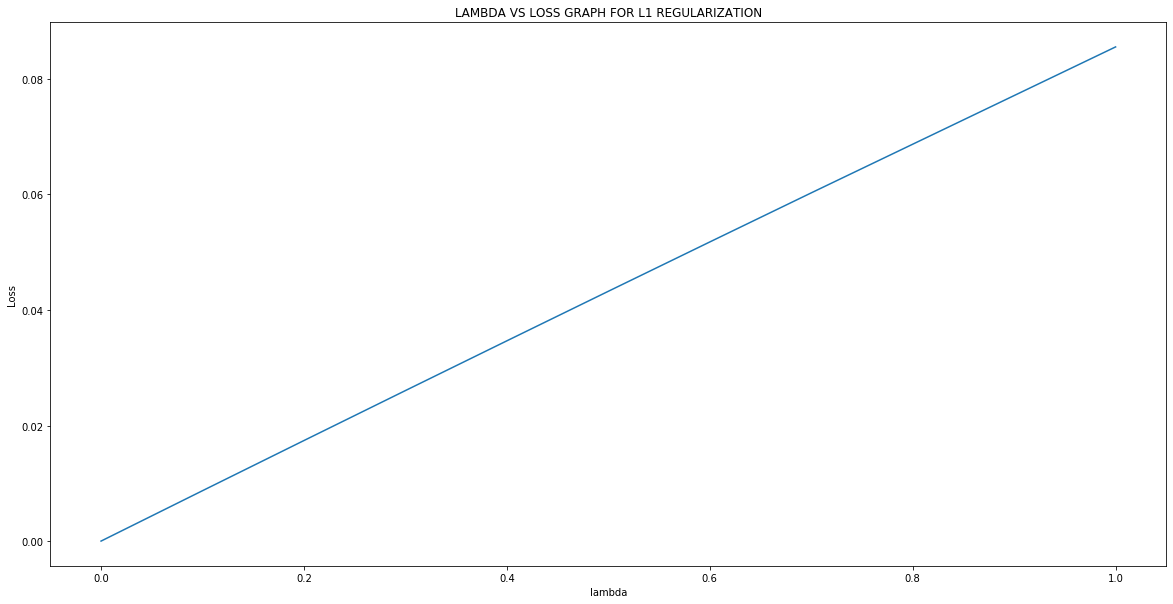

In [41]:
Cost_Final= []
Coeff= []
cost_min=1;
for lmbda in lmbda1:
    newBRegL1, cost_history = gradient_descentReg(X, Y, B,0.0001,100 ,lmbda)
    if cost_min>cost_history[-1] : cost_min= cost_history[-1]
    Cost_Final.append(cost_history[-1])
    Coeff.append(newBRegL1)

ind= np.where(Cost_Final== cost_min)
print(ind[0])

BRegL1, cost= gradient_descentReg(X, Y, B, alpha, 300,0)
print(BRegL1,"\n",cost[-1])
# New Values of B
# print("Coefficients for gradient descent with L1 regularization:\n",Coeff)
# print("\n")
# Final Cost of new B
# print("Cost:\n",Cost_Final)
# print(Cost_Final)
plt.plot(lmbda1,Cost_Final)
plt.xlabel("lambda")
plt.ylabel("Loss")
plt.title("LAMBDA VS LOSS GRAPH FOR L1 REGULARIZATION")
plt.show()


In [42]:
def rmse(Y, Y_pred):
    rmse = np.sqrt(sum((Y - Y_pred) ** 2) / len(Y))
    return rmse

# Model Evaluation - R2 Score
def r2_score(Y, Y_pred):
    mean_y = np.mean(Y)
#     print(mean_y)
    ss_tot = sum((Y) ** 2)
    ss_res = sum((Y - Y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

Y_pred = X.dot(BRegL1)

print("RMS ERROR: ",rmse(Y, Y_pred))
print("R squared value:",r2_score(Y, Y_pred))

RMS ERROR:  0.13846502234166277
R squared value: 0.9997545624006856


In [30]:
B=np.array([0,0,0])

[]
[ 0.00777788 -0.15354583 -0.01744042] 0.021529806897285814


Text(0.5, 1.0, 'LAMBDA VS LOSS GRAPH FOR L2 REGULARIZATION')

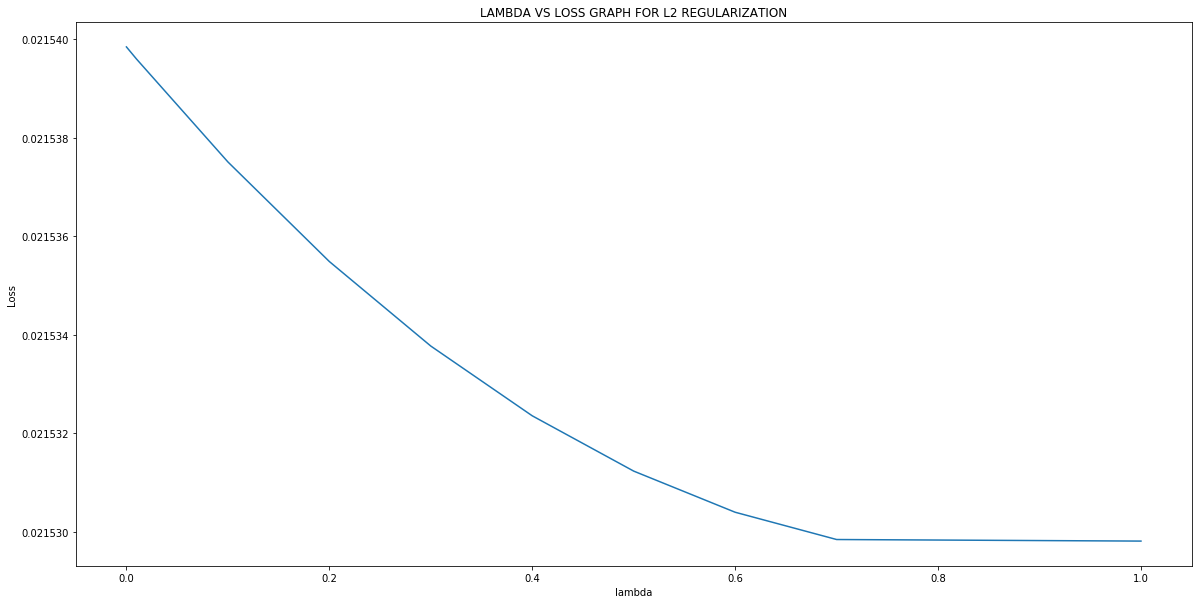

In [36]:
Cost_final2=[]
Coeff2=[]
cost_min2=0
for lmbda in lmbda1:
    newBRegL2, cost_history = gradient_descentRegL2(X, Y, B, alpha, 300,lmbda)
    if cost_min>cost_history[-1] : cost_min2= cost_history[-1]
    Cost_final2.append(cost_history[-1])
    Coeff2.append(newBRegL2)

ind2= np.where(Cost_final2== cost_min2)
print(ind2[0])

BRegL2, cost= gradient_descentRegL2(X, Y, B, alpha, 300,1)
print(BRegL2,"\n",cost[-1])
# New Values of B
# print("Coefficients for gradient descent with L2 regularization:", Coeff2)
# Final Cost of new B
# print("Cost:",Cost_final2)
plt.plot(lmbda1,Cost_final2)
plt.xlabel("lambda")
plt.ylabel("Loss")
plt.title("LAMBDA VS LOSS GRAPH FOR L2 REGULARIZATION")


In [35]:
def rmse(Y, Y_pred):
    rmse = np.sqrt(sum((Y - Y_pred) ** 2) / len(Y))
    return rmse

# Model Evaluation - R2 Score
def r2_score(Y, Y_pred):
    mean_y = np.mean(Y)
#     print(mean_y)
    ss_tot = sum((Y) ** 2)
    ss_res = sum((Y - Y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

Y_pred = X.dot(Coeff2[5])

print("RMS ERROR: ",rmse(Y, Y_pred))
print("R squared value:",r2_score(Y, Y_pred))

RMS ERROR:  0.13846489298443293
R squared value: 0.9997545628592723
